# necessary package

In [1]:
from radiative_transfer import Gf,sd
import numpy as np
import matplotlib.pyplot as plt

# preparing the data

For just decomposing the spectra into a few Gaussian components, you just need the spectra velocity, intensity (TB or tau), and the error for the intensity.

For radiative transfer that combines both HI emission and absorption, you need the emission spectra (velocity_TB, TB, TB_err) and the absorption spectra (velocity_tau, 1-$e^{-\tau}$, error)

In [2]:
import glob
import read_GASKAP_data as rd
datapathbase='/d/bip5/hchen'
nemi=np.sort(glob.glob(datapathbase+'/LMC_GASKAP_emi_all_abs/*.txt'))
nabs_n=glob.glob(datapathbase+'/LMC_abs_new/abs_v1.0/sb*')
nabs=[None] * len(nemi)
for i, ni in enumerate(nemi):
    na_=ni[-18:-4]
    for nj in nabs_n:
        _=glob.glob(nj+'/averaged/spectra/*_spec.vot')
        _all=[filename[-23:-9] for filename in _]
        if na_ in _all:
            if nabs[i] is not None:
                print(i,nj,na_)
                break  # Exit the loop once a match is found for this `na_`
            else:
                nabs[i] = f'{nj}/averaged/spectra/{na_}_spec.vot'  # Record `nj` only once for this `na_`
                
nemi,nabs=np.array(nemi),np.array(nabs)  
nlist=[filename[-18:-4] for filename in nemi]
nlist=np.array(nlist)        
nabs=np.array(nabs)  


p=np.argwhere(np.array(nlist)=='J045541-690629').flatten()
j=p[0]
spectra=rd.get_emi_abs_data(nlist[j],nabs[j],1,1,mode='LMC',v_move=0.,nemi=0.5,nabs=3)
x,y,yerr,xemi,yemi,yemi_err=spectra['velocity_tau'],spectra['1_e_tau'],spectra['1_e_tau_err'],spectra['velocity_TB'],spectra['TB'],spectra['TB_err']

# Simple Gaussian decomposition

This example is just to decompose a spectrum into a few Gaussian components, there are two methods available, F_test and BIC

BIC  730.6758025329558 n=1
BIC  63.652624233737285 n= 2
BIC  66.91405599650928 n= 3
final BIC= 63.652346660554606 n= 2


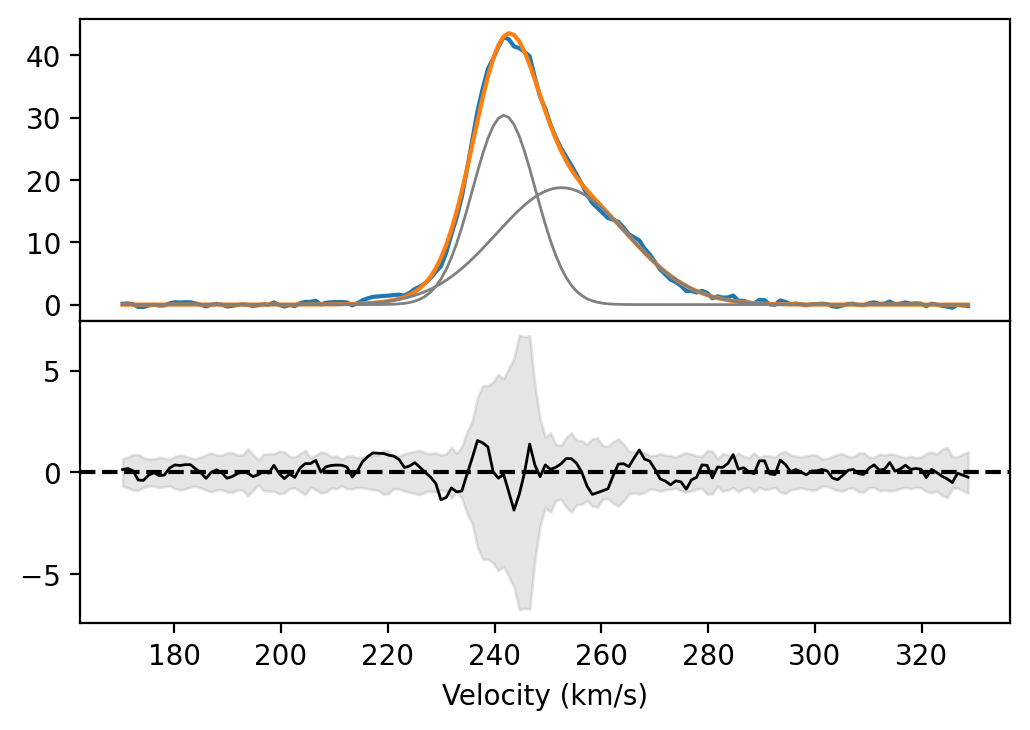

In [3]:

gf=Gf(x,yemi,yemi_err)
gf.fit_mode= 'BIC'
gf.fitting_plot()

F value: 0.9999999999999999 n= 1
F value: 0.29958887780180454 n= 2


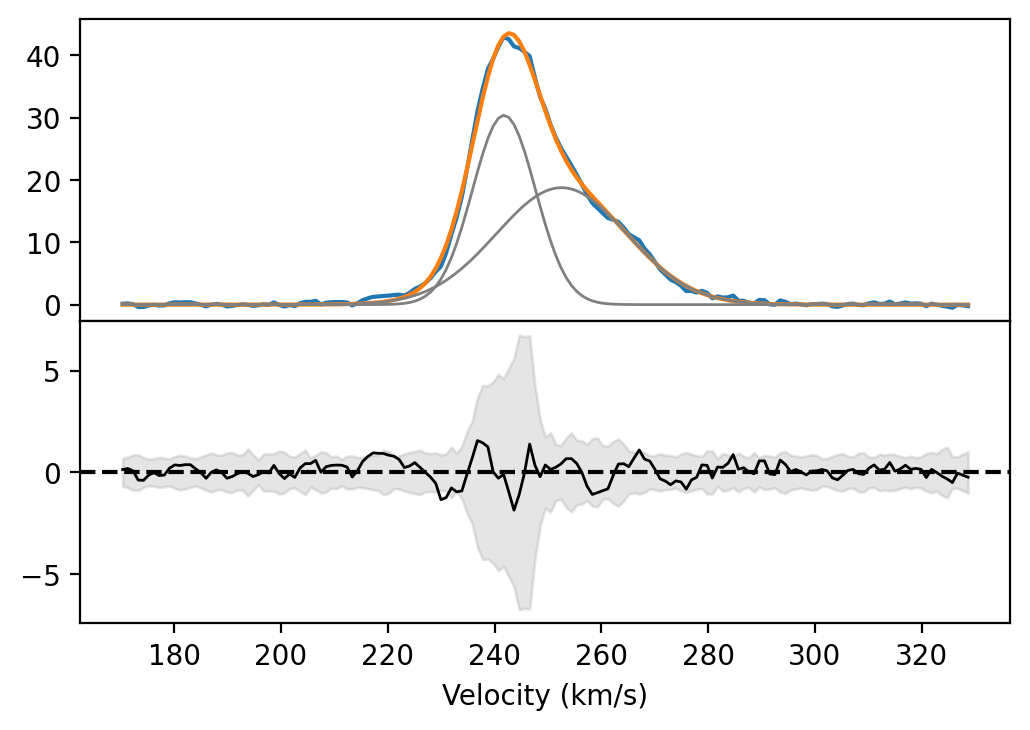

In [4]:
gf=Gf(x,yemi,yemi_err)
gf.fit_mode= 'F_test'
gf.fitting_plot()

# radiative transfer

This is an example to use radiative transfer code, the method is based on BIC if you choose to run automatically.

**If your emission and absorption data are not aligned in velocity, make sure to use 'spec_fit.align_data=True'** 

Here are an explanation of the code:

Input: `spec_fit=sd(x,y,yerr,xemi,yemi,yemi_err)`

>`x` and `xemi` are the absorption and emission spectra velocity. `y,yerr` is absorption spectrum and error in **$1-e^{-\tau}$**, `yemi,yemi_err` is emission spectra and error (TB).

Name: `spec_fit.name`

> This code set the title of the plot and the 'Name' of the saved .csv data

Velocity shift: `spec_fit.v_shift`

> This code set the maximum allowed velocity shift when the CNM components identified in the absorption fit to the emission

Manually input the number of Gaussians: `spec_fit.peak_abs=[]` and `spec_fit.peak_emi=[]`

> If you want to mannually assign the number of Gaussians, add the velocity center that you choose inside `[]`. For example, if you want to assign two Gaussian components with velocity at 200 and 240km/s in absorption, you can do `spec_fit.peak_abs=[200,240]`. If it's blank, it will run automatically using the BIC method.

Sky temperature: `spec_fit.Tsky`

> The sky temeprature is the CMB temperature + the synchrotron emission, default is 2.73.

Minimum allowed spin temperature: `spec_fit.Tsmin`

> This is to set the minimum allowed spin temperature, usually set to be the same as sky temperature, default is 2.73.

Save the data in csv format:`spec_fit.savecsv`, `spec_fit.datapath`

> If you want to save the data, set this as `spec_fit.savecsv=True`. Note that it just append data to the existing csv, if you start a new one, don't forget to make it empty first. You can also set the directory that you want to store the data using `spec_fit.datapath`, the default is the current directory.

renew the results: `spec_fit.renew`

> This is for rerunning the code and store the data, it will replace the row of previous data.


Run the code: `spec_fit.fit_and_plot()`

> if you want to save the figure, do `fig.savefig('./%s.png' % (nlist[j]), dpi=300, bbox_inches='tight')`



start absorption fitting
BIC  252.8923265105613 n=1
BIC  214.8845649339485 n= 2
BIC  220.50730751000663 n= 3
final BIC= 214.8846553241145 n= 2
manual BIC= 278.55372963236937
Absorption fitting finished
start emission fitting
Fitting mode: BIC
BIC  3322.17905953963 Mean_score  3324.1569524165384 nemi= 0
BIC  100.33087436168243 Mean_score  102.43533945641859 nemi= 1
BIC  51.900539923286715 Mean_score  53.54814010317092 nemi= 2
BIC  80.56219132992878 Mean_score  81.57131128674052 nemi= 3
final BIC  51.900539923286715 mean score  53.54814010317092 nemi= 2
velocity shift [ 0.25329877 -1.74859032]
nhi_c: 5.554314744223449 error: 1.27803838884174
nhi_w: 16.552570826370456 error: 0.5157966884048492
fc: 0.2512481790565595 error: 0.04368181037108098



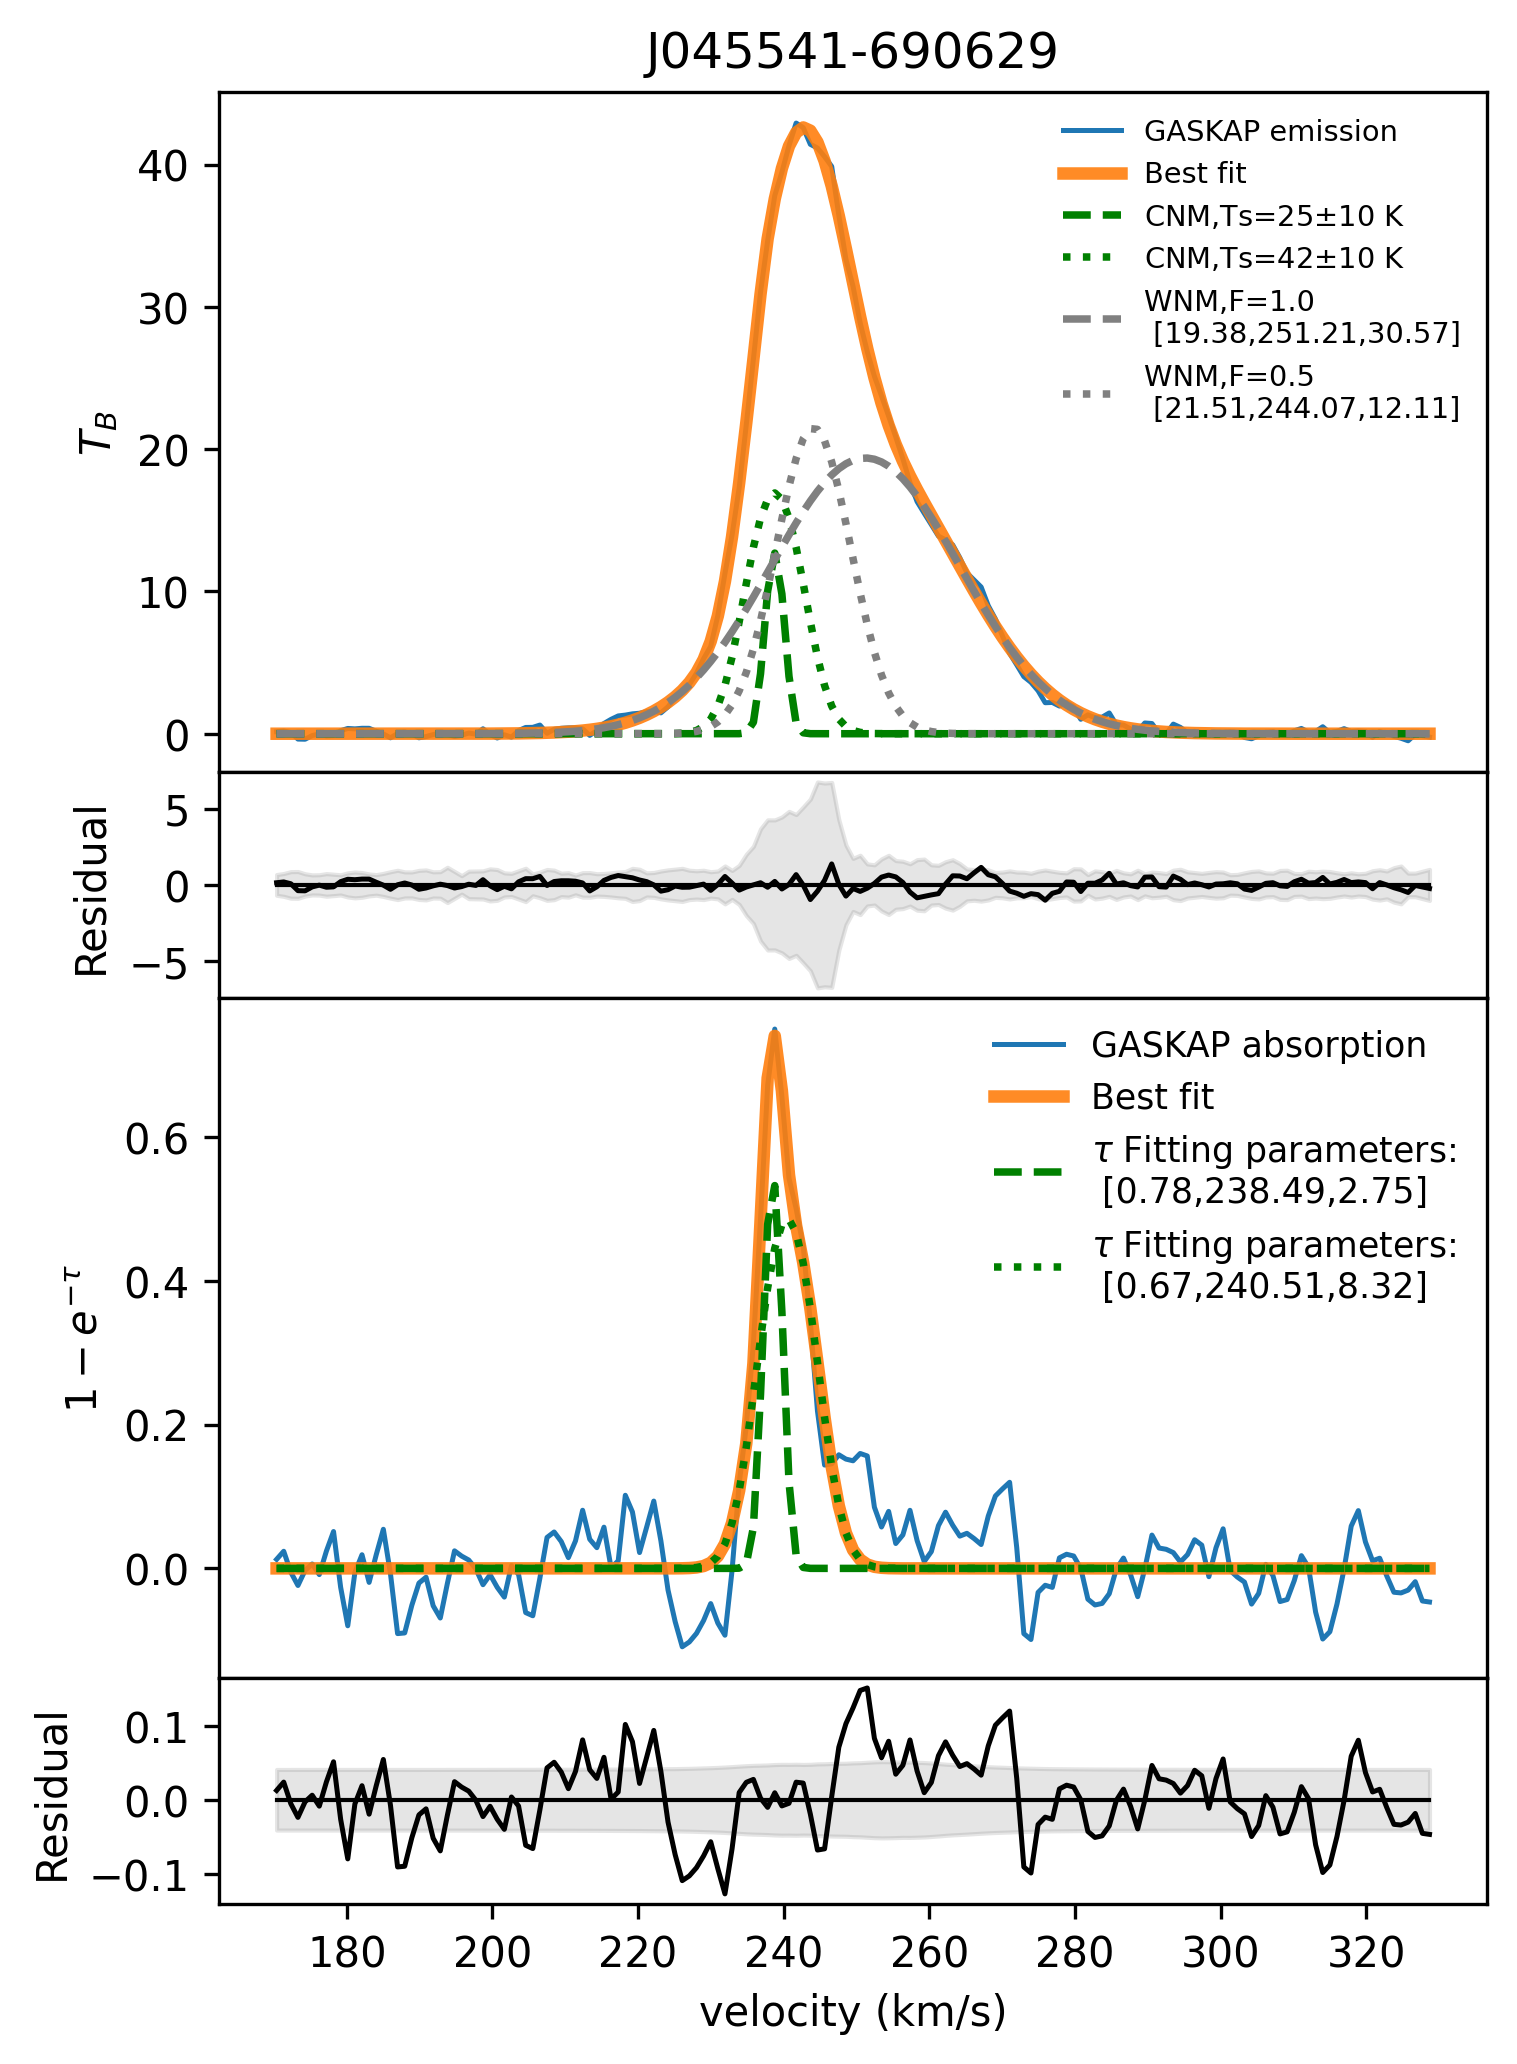

In [6]:
from importlib import reload
import radiative_transfer
reload(radiative_transfer.Gaussian_fitting)
reload(radiative_transfer.spectra_decomposing)
reload(radiative_transfer)
from radiative_transfer import Gf
from radiative_transfer import sd

fig = plt.figure(figsize=(12, 8), dpi=300)

ax1_first = plt.subplot2grid((8, 2), (0, 0), rowspan=3, fig=fig)

ax = [ax1_first,
       plt.subplot2grid((8, 2), (3, 0), rowspan=1, fig=fig, sharex=ax1_first),
       plt.subplot2grid((8, 2), (4, 0), rowspan=3, fig=fig, sharex=ax1_first),
       plt.subplot2grid((8, 2), (7, 0), fig=fig, sharex=ax1_first)]



spec_fit=sd(x,y,yerr,xemi,yemi,yemi_err) #input data
spec_fit.name='J045541-690629'
spec_fit.v_shift=4
spec_fit.peak_abs=[]
spec_fit.peak_emi=[]
tsyn,_=rd.read_synchro_emi(nlist[j],radius=30)
spec_fit.Tsky=2.73+tsyn
spec_fit.Tsmin=2.73+tsyn
spec_fit.ax=ax
spec_fit.savecsv=True
spec_fit.datapath='./test_csv/'
spec_fit.renew=True



spec_fit.fit_and_plot()
